# Mortality Predictions in ICU using ANN (88.62%  or  ~89%)

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Modelling Helpers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

import keras
from keras import backend as K

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

Using TensorFlow backend.


In [3]:
import pandas as pd
df = pd.read_csv(r'C:\Users\USER\Downloads\Compressed\Mortality-Prediction-in-ICU-using-ANN-89-percent-master\train.csv', encoding = 'utf-8')

In [4]:
labels = pd.read_csv(r'C:\Users\USER\Downloads\Compressed\Mortality-Prediction-in-ICU-using-ANN-89-percent-master\labels.csv', encoding = 'utf-8')

In [115]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [116]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [117]:
df.shape

(3999, 42)

In [118]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [119]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [120]:
labels.shape

(3999, 1)

**One hot encoding**

In [5]:
temp  =[]
for i in labels["In-hospital_death"]:
  if i == 0:
    temp.append([1,0])
  else:
    temp.append([0,1])
temp = np.array(temp)

In [6]:
print(temp.shape)

(3999, 2)


In [7]:
new = pd.concat([df , labels] , axis = 1)
print(new.shape)

(3999, 43)


**Using correlation heatmap to find important features and their relations with other features.**

### Remember , "correlation is not causation".

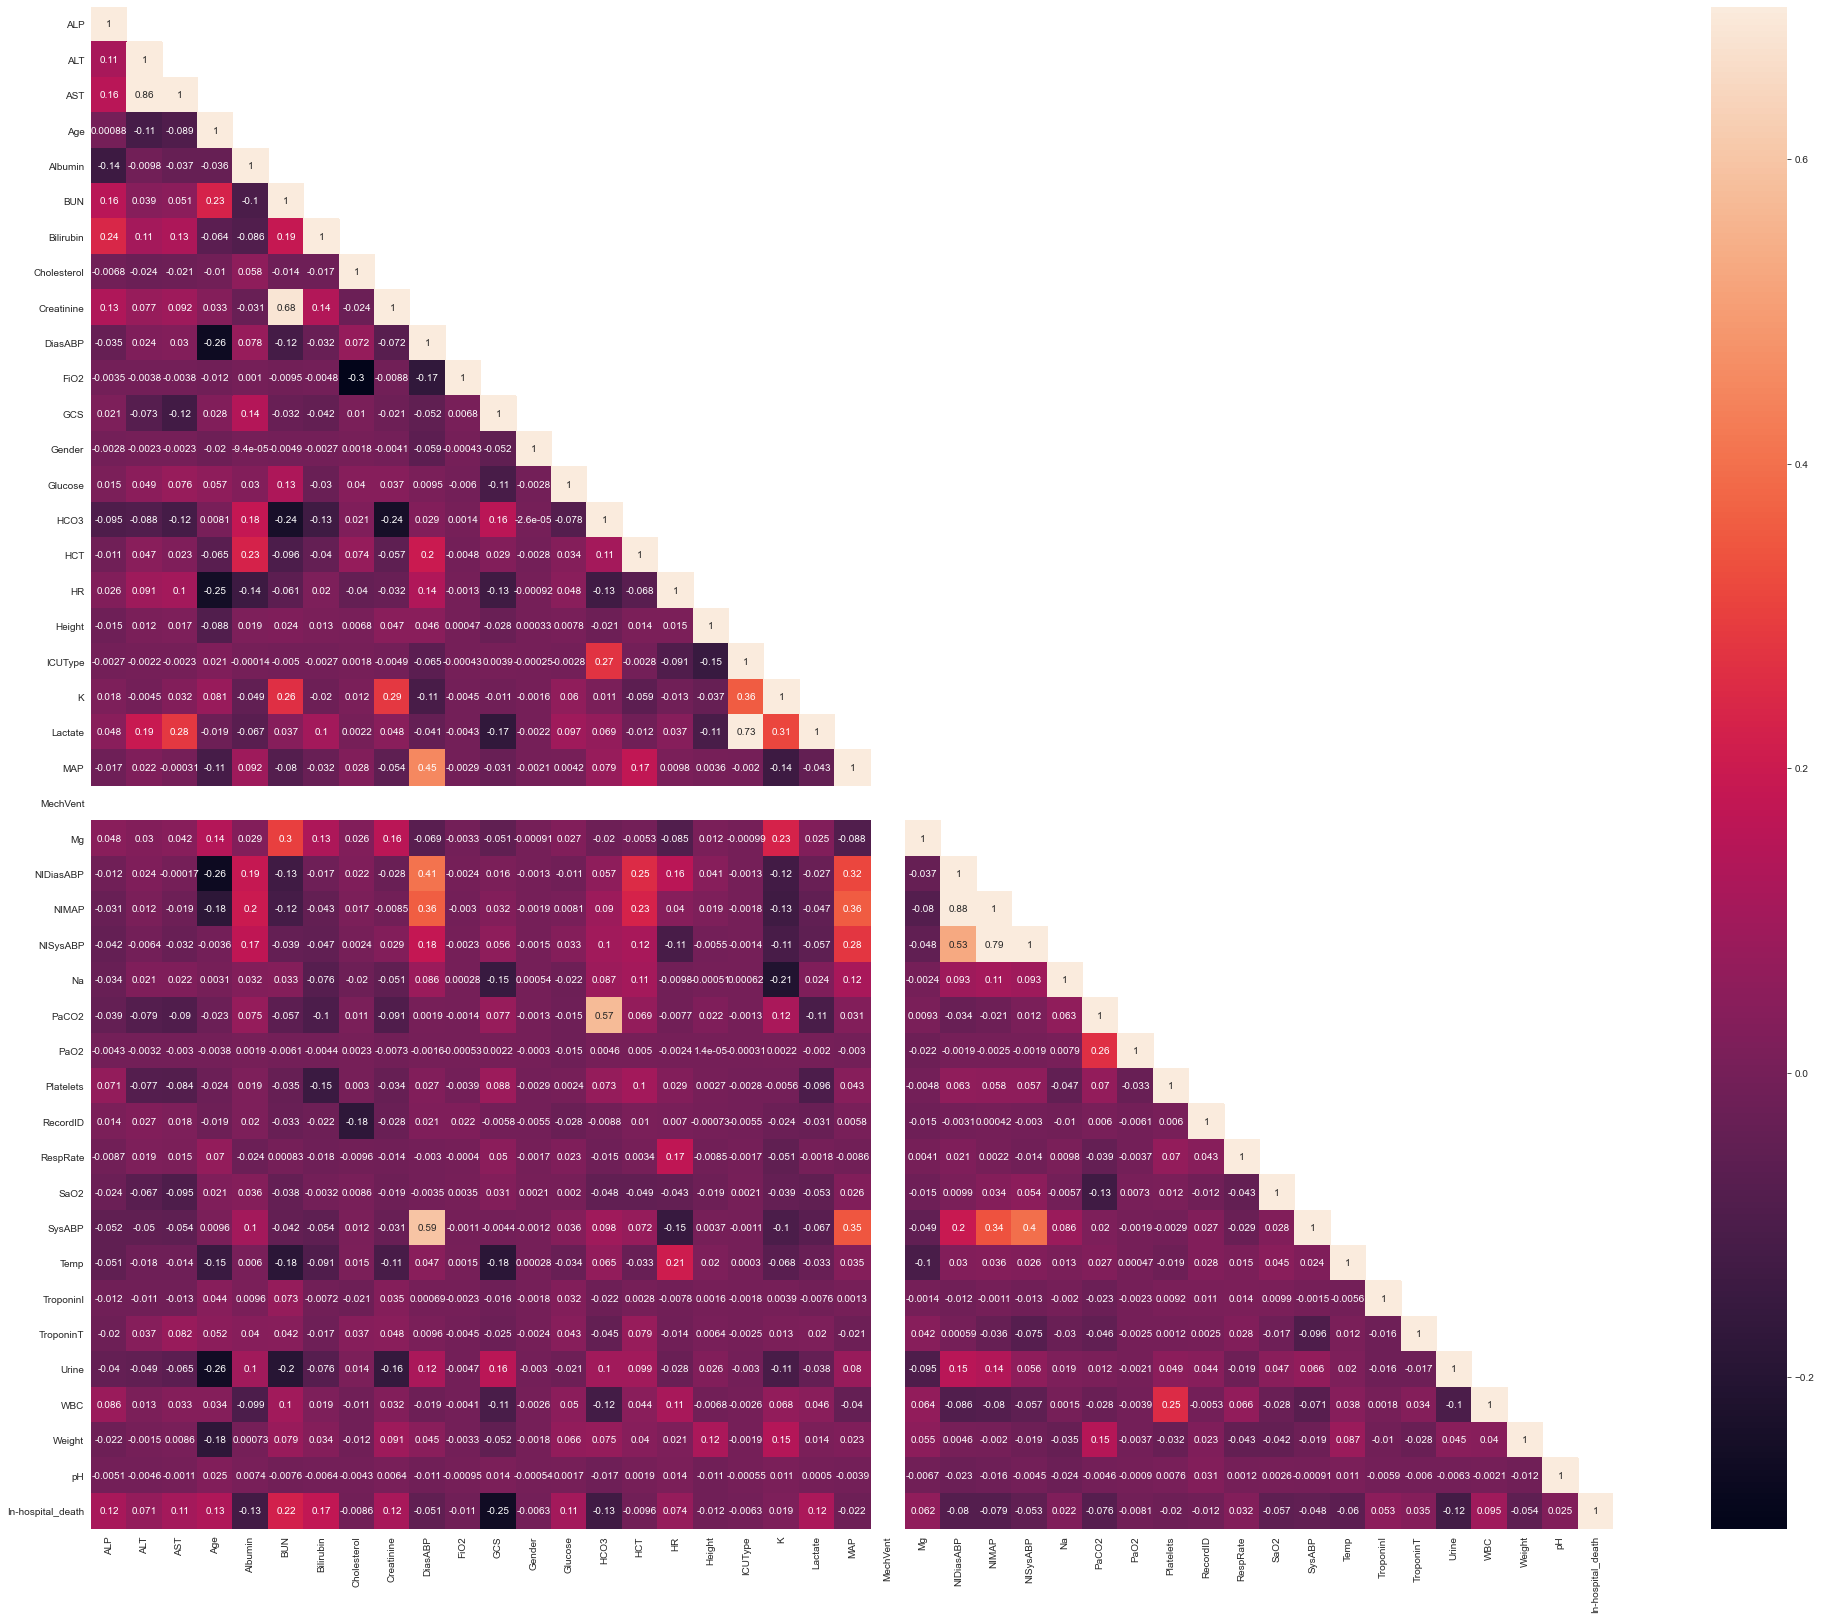

In [124]:
correlation_map = new[new.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(35,28)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

In [8]:
new_df = new.drop(['In-hospital_death'] , axis =1)
new_df.shape

(3999, 42)

In [9]:
df = new_df

### After repeated feature selection , the below were the best set of features to be dropped to get the best model performance.

### Best feature selection is done on the basis of intuition and context.

In [10]:
df = df.drop(['Gender','Cholesterol','HCT','ICUType','Height'] , axis =1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [12]:
X = df
y = temp

In [13]:
print(X.shape , y.shape)

(3999, 37) (3999, 2)


In [14]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size = 0.2)

In [15]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3199, 37) (800, 37) (3199, 2) (800, 2)


In [18]:
from imblearn.over_sampling import RandomOverSampler

ModuleNotFoundError: No module named 'imblearn'

In [133]:
filepath="icu_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

### Checkpointing the model weights and saving prior to overfitting.

In [134]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

## This is the best model that I can come up with and has a validation accuracy of 88.62 %.

### After repeatedly tuning the model architecture and other hyperparameters , finally a layer of BatchNormalization did some good to accuracy when added to correct place in the architecture.

In [135]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.005),loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                2432      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_16 (Dense)             (None, 196)               38612     
_________________________________________________________________
batch_normalization_3 (Batch (None, 196)               784       
_________________________________________________________________
dense_17 (Dense)             (None, 256)               50432     
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 514       
Total para

In [136]:
history = model.fit(X_train, y_train , epochs=15 , batch_size = 128 , validation_data=(X_test, y_test) , callbacks=[checkpoint,lr_reduce])

Train on 3199 samples, validate on 800 samples
Epoch 1/15
3199/3199 [==============================] - 1s 407us/step - loss: 0.3919 - acc: 0.8371 - val_loss: 0.4332 - val_acc: 0.8588
Epoch 2/15
3199/3199 [==============================] - 0s 57us/step - loss: 0.3374 - acc: 0.8620 - val_loss: 0.4047 - val_acc: 0.8588
Epoch 3/15
2176/3199 [===================>..........] - ETA: 0s - loss: 0.3224 - acc: 0.8764Epoch 00003: val_acc did not improve

Epoch 00003: reducing learning rate to 0.0004999999888241291.
3199/3199 [==============================] - 0s 84us/step - loss: 0.3292 - acc: 0.8679 - val_loss: 0.3986 - val_acc: 0.8588
Epoch 4/15
2304/3199 [====================>.........] - ETA: 0s - loss: 0.3162 - acc: 0.8655Epoch 00004: val_acc did not improve

Epoch 00004: reducing learning rate to 4.9999996554106475e-05.
3199/3199 [==============================] - 0s 55us/step - loss: 0.3052 - acc: 0.8723 - val_loss: 0.3808 - val_acc: 0.8588
Epoch 5/15
2176/3199 [===================>.......

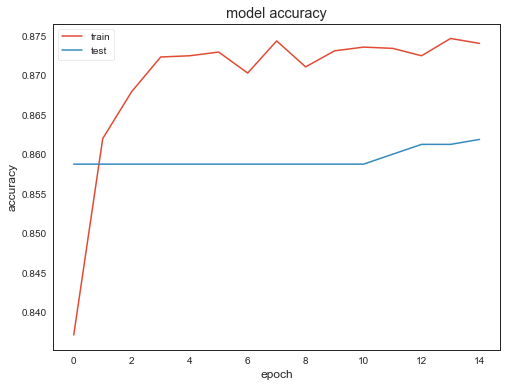

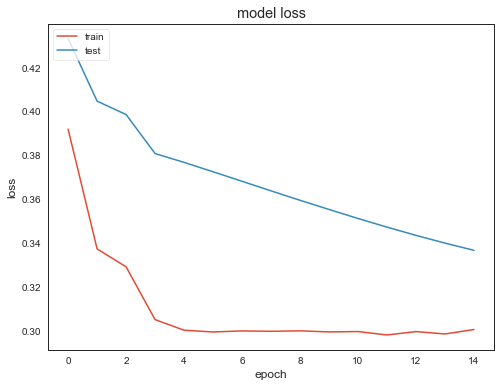

In [137]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

** 0 - Survival in hospital , 
   1 - Death in hospital.**

**Also are survivial and deaths are not equal , so we can't use validation accuracy as the soul criterion for calculating model performance.**

### Here, precision is more significant than recall (particularly for this dataset). This is due to the fact and the area of context in which the problem lies. 

### The context is ......

### In the above problem, lets say for one time the model can predict a person in ICU who would be dead in coming future as alive

## BUT

### A model must not predict a person in ICU who would stay alive in coming future as dead.

#### Just try to read the above lines more and more to get the real essense of those lines above.
#### Therefore, this leads to minimize the false positives in the above example which gives higher precision. (positive is for deaths as stated above)

In [138]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

### The precision for the model is approx 80% and the validation accuracy is approx. 89%.

In [139]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

[[686   1]
 [110   3]]


In [140]:
print(accuracy_score(y_true,pred))

0.86125


In [141]:
from sklearn.metrics import roc_auc_score

# predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)

# calculate ROC score
roc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC Score:', roc_score)


ROC Score: 0.8218237559737732
